# Baseline comparison and Ablation study

This notebook shows the performance comparison of our models with other models  

## Set up the analysis

### Import the python modules

In [1]:
import pandas as pd
import numpy as np
import json
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.pyplot import MultipleLocator

### Utils functions

In [2]:
## acc, f1, pre, recall
def parse_json_epoch(dir,checkpoint,fold,epoch):
    data=json.load(open(dir+"fold_"+str(fold)+"/checkpoint-"+str(checkpoint)+"/trainer_state.json","r"))
    data=data["log_history"]
    best_id=0
    max_f1=0
    for i in range(int(epoch*15305/160/5)):
        if i %2==1:
            if data[i]['eval_f1_ave'] > max_f1:
                max_f1=data[i]['eval_f1_ave']
                best_id=i
        else:
            continue
    print("The best epoch is ",str(data[best_id]["epoch"]))
    data=pd.DataFrame.from_dict(data[best_id],orient='index')
    data=data[[i.startswith(("eval_acc","eval_f1","eval_precision","eval_recall")) for i in data.index.to_list()]]
    data=data.drop("eval_f1_ave")
    return(data.to_numpy().reshape(4,9))

In [3]:
def wide_to_long(metric,anno):
    metric=metric.stack().reset_index()
    metric.columns=["Task","metric","value"]
    metric["type"]=anno
    return(metric)

## Metrics of models

### Augumented model

In [4]:
aug_result=pd.read_csv('../result/results_aug_all.csv')

In [5]:
aug_result

,ace2_bind_0,COV2-2096_400_0,COV2-2832_400_0,COV2-2094_400_0,COV2-2050_400_0,COV2-2677_400_0,COV2-2479_400_0,COV2-2165_400_0,COV2-2499_400_0,ace2_bind_1,...,COV2-2499_400_3,ace2_bind_4,COV2-2096_400_4,COV2-2832_400_4,COV2-2094_400_4,COV2-2050_400_4,COV2-2677_400_4,COV2-2479_400_4,COV2-2165_400_4,COV2-2499_400_4
0,0.829370,0.874575,0.940946,0.873008,0.879540,0.901489,0.865952,0.877711,0.915338,0.808466,...,0.925248,0.804234,0.882384,0.945112,0.881861,0.884997,0.910612,0.882384,0.882645,0.916100
1,0.635236,0.783127,0.740764,0.706453,0.663174,0.745534,0.579980,0.572308,0.842957,0.632146,...,0.870877,0.627241,0.797011,0.772133,0.710291,0.672529,0.758983,0.591132,0.585351,0.848220
2,0.828069,0.839146,0.764005,0.812370,0.801393,0.861066,0.726375,0.714360,0.872193,0.820469,...,0.878397,0.805105,0.841650,0.780319,0.806374,0.779519,0.863856,0.706063,0.734566,0.869669
3,0.663230,0.805656,0.751725,0.741231,0.701380,0.786250,0.601290,0.592903,0.856463,0.653790,...,0.874567,0.647105,0.816008,0.776151,0.743929,0.707022,0.798120,0.616350,0.611118,0.858346


In [6]:
metric=pd.read_csv('../data/covid_model.csv',index_col=0)

In [7]:
task=metric.index

In [8]:
aug_metric=pd.DataFrame(index=task)

In [9]:
aug_metric["Accuracy"]=aug_result.iloc[0,:].to_numpy().reshape(5,9).mean(axis=0)
aug_metric["Precision"]=aug_result.iloc[1,:].to_numpy().reshape(5,9).mean(axis=0)
aug_metric["Recall"]=aug_result.iloc[2,:].to_numpy().reshape(5,9).mean(axis=0)
aug_metric["F1"]=aug_result.iloc[3,:].to_numpy().reshape(5,9).mean(axis=0)

In [10]:
aug_metric

,Accuracy,Precision,Recall,F1
Task,,,,
ACE2,0.809115,0.624695,0.806465,0.645141
COV2-2096,0.881665,0.796557,0.845020,0.816763
COV2-2832,0.940466,0.752408,0.781935,0.765569
COV2-2094,0.873981,0.699426,0.797706,0.732403
COV2-2050,0.879417,0.663110,0.791520,0.699709
COV2-2677,0.905342,0.743955,0.867620,0.786642
COV2-2479,0.873197,0.587098,0.713696,0.610701
COV2-2165,0.880671,0.575018,0.702941,0.596479
COV2-2499,0.919298,0.854127,0.876338,0.864510


In [11]:
fold=[0]*9+[1]*9+[2]*9+[3]*9+[4]*9

In [12]:
aug_metric_all=pd.DataFrame({"task":task.to_list()*5,"fold":fold})

In [13]:
aug_metric_all["Accuracy"]=aug_result.iloc[0,:].to_numpy()
aug_metric_all["Precision"]=aug_result.iloc[1,:].to_numpy()
aug_metric_all["Recall"]=aug_result.iloc[2,:].to_numpy()
aug_metric_all["F1"]=aug_result.iloc[3,:].to_numpy()

In [14]:
aug_metric_all.head()

,task,fold,Accuracy,Precision,Recall,F1
0,ACE2,0,0.829370,0.635236,0.828069,0.663230
1,COV2-2096,0,0.874575,0.783127,0.839146,0.805656
2,COV2-2832,0,0.940946,0.740764,0.764005,0.751725
3,COV2-2094,0,0.873008,0.706453,0.812370,0.741231
4,COV2-2050,0,0.879540,0.663174,0.801393,0.701380


### eunirep model

In [15]:
eunirep_result=pd.read_csv('../result/results_eunirep.csv')

In [16]:
task=metric.index
eunirep_metric=pd.DataFrame(index=task)

In [17]:
eunirep_metric["Accuracy"]=eunirep_result.iloc[0,:].to_numpy().reshape(5,9).mean(axis=0)
eunirep_metric["Precision"]=eunirep_result.iloc[1,:].to_numpy().reshape(5,9).mean(axis=0)
eunirep_metric["Recall"]=eunirep_result.iloc[2,:].to_numpy().reshape(5,9).mean(axis=0)
eunirep_metric["F1"]=eunirep_result.iloc[3,:].to_numpy().reshape(5,9).mean(axis=0)

In [18]:
eunirep_metric

,Accuracy,Precision,Recall,F1
Task,,,,
ACE2,0.686815,0.551238,0.695281,0.505625
COV2-2096,0.855530,0.760493,0.818070,0.782557
COV2-2832,0.876854,0.635722,0.776875,0.669790
COV2-2094,0.842620,0.665886,0.785607,0.696828
COV2-2050,0.869905,0.652796,0.778647,0.685702
COV2-2677,0.876699,0.702769,0.845312,0.743867
COV2-2479,0.691053,0.543608,0.666423,0.490176
COV2-2165,0.791040,0.570381,0.662546,0.537167
COV2-2499,0.887728,0.799976,0.850170,0.820999


In [19]:
eunirep_metric_all=pd.DataFrame({"task":task.to_list()*5,"fold":fold})

In [20]:
eunirep_metric_all["Accuracy"]=eunirep_result.iloc[0,:].to_numpy()
eunirep_metric_all["Precision"]=eunirep_result.iloc[1,:].to_numpy()
eunirep_metric_all["Recall"]=eunirep_result.iloc[2,:].to_numpy()
eunirep_metric_all["F1"]=eunirep_result.iloc[3,:].to_numpy()

In [21]:
eunirep_metric_all.head()

,task,fold,Accuracy,Precision,Recall,F1
0,ACE2,0,0.628168,0.570600,0.744043,0.508896
1,COV2-2096,0,0.858375,0.761678,0.826416,0.785861
2,COV2-2832,0,0.898354,0.645838,0.759570,0.680558
3,COV2-2094,0,0.837993,0.667619,0.788501,0.698121
4,COV2-2050,0,0.842435,0.631609,0.794035,0.661488


### gunirep model

In [22]:
gunirep_result=pd.read_csv('../result/results_gunirep.csv')

In [23]:
gunirep_metric=pd.DataFrame(index=task)

In [24]:
gunirep_metric["Accuracy"]=gunirep_result.iloc[0,:].to_numpy().reshape(5,9).mean(axis=0)
gunirep_metric["Precision"]=gunirep_result.iloc[1,:].to_numpy().reshape(5,9).mean(axis=0)
gunirep_metric["Recall"]=gunirep_result.iloc[2,:].to_numpy().reshape(5,9).mean(axis=0)
gunirep_metric["F1"]=gunirep_result.iloc[3,:].to_numpy().reshape(5,9).mean(axis=0)

In [25]:
gunirep_metric

,Accuracy,Precision,Recall,F1
Task,,,,
ACE2,0.728670,0.584207,0.740082,0.570541
COV2-2096,0.829030,0.727710,0.789920,0.749259
COV2-2832,0.869276,0.624465,0.764288,0.656338
COV2-2094,0.826730,0.648848,0.766146,0.675571
COV2-2050,0.830337,0.615388,0.755263,0.639273
COV2-2677,0.865043,0.689376,0.836194,0.728235
COV2-2479,0.760610,0.553142,0.680207,0.532647
COV2-2165,0.603643,0.562774,0.583587,0.389988
COV2-2499,0.852447,0.749601,0.804442,0.770781


In [26]:
gunirep_metric_all=pd.DataFrame({"task":task.to_list()*5,"fold":fold})

In [27]:
gunirep_metric_all["Accuracy"]=gunirep_result.iloc[0,:].to_numpy()
gunirep_metric_all["Precision"]=gunirep_result.iloc[1,:].to_numpy()
gunirep_metric_all["Recall"]=gunirep_result.iloc[2,:].to_numpy()
gunirep_metric_all["F1"]=gunirep_result.iloc[3,:].to_numpy()

### Esm1b embeddings

In [28]:
no_freeze=pd.read_csv('../result/results_esm_embeddings.csv')

In [29]:
no_freeze=no_freeze.to_numpy().reshape(5,9,4)
no_freeze_metric=pd.DataFrame(index=task)

In [30]:
no_freeze_metric["Accuracy"]=no_freeze[:,:,0].mean(axis=0)
no_freeze_metric["Precision"]=no_freeze[:,:,1].mean(axis=0)
no_freeze_metric["Recall"]=no_freeze[:,:,2].mean(axis=0)
no_freeze_metric["F1"]=no_freeze[:,:,3].mean(axis=0)

In [31]:
no_freeze_metric

,Accuracy,Precision,Recall,F1
Task,,,,
ACE2,0.919507,0.459753,0.500000,0.479028
COV2-2096,0.843979,0.858514,0.580792,0.596382
COV2-2832,0.938114,0.968999,0.514759,0.512667
COV2-2094,0.896666,0.851273,0.507290,0.487414
COV2-2050,0.926301,0.963030,0.521485,0.521886
COV2-2677,0.908321,0.886260,0.533117,0.538237
COV2-2479,0.951495,0.575746,0.500559,0.488682
COV2-2165,0.959231,0.479615,0.500000,0.489595
COV2-2499,0.857882,0.892690,0.599827,0.626789


In [32]:
fold=[0]*9+[1]*9+[2]*9+[3]*9+[4]*9

In [33]:
no_freeze_metric_all=pd.DataFrame({"task":task.to_list()*5,"fold":fold})

In [34]:
no_freeze_metric_all["Accuracy"]=no_freeze[:,:,0].flatten()
no_freeze_metric_all["Precision"]=no_freeze[:,:,1].flatten()
no_freeze_metric_all["Recall"]=no_freeze[:,:,2].flatten()
no_freeze_metric_all["F1"]=no_freeze[:,:,3].flatten()

In [35]:
no_freeze_metric_all.head()

,task,fold,Accuracy,Precision,Recall,F1
0,ACE2,0,0.923177,0.461589,0.500000,0.480027
1,COV2-2096,0,0.847400,0.867015,0.579273,0.595077
2,COV2-2832,0,0.941469,0.970681,0.515152,0.514309
3,COV2-2094,0,0.893650,0.946714,0.509639,0.490770
4,COV2-2050,0,0.929187,0.964426,0.531142,0.540189


### Esm1b finetuning with random noise

In [36]:
rand_noise=np.load('../result/rand_noise.npy')

In [37]:
rand_noise_mean=rand_noise.mean(axis=0)

In [38]:
rand_noise_metric=pd.DataFrame(index=task)

In [39]:
rand_noise_metric["Accuracy"]=rand_noise_mean[0]
rand_noise_metric["Precision"]=rand_noise_mean[2]
rand_noise_metric["Recall"]=rand_noise_mean[3]
rand_noise_metric["F1"]=rand_noise_mean[1]

In [40]:
rand_noise_metric

,Accuracy,Precision,Recall,F1
Task,,,,
ACE2,0.892379,0.481902,0.493245,0.483834
COV2-2096,0.866353,0.779415,0.811764,0.791683
COV2-2832,0.919925,0.627765,0.588773,0.602909
COV2-2094,0.882867,0.664597,0.614235,0.630922
COV2-2050,0.932782,0.781755,0.687724,0.720912
COV2-2677,0.915743,0.770838,0.699486,0.723201
COV2-2479,0.952122,0.743644,0.666326,0.693258
COV2-2165,0.938688,0.514425,0.506453,0.506409
COV2-2499,0.869069,0.776607,0.809671,0.788988


In [41]:
rand_noise_metric_all=pd.DataFrame({"task":task.to_list()*5,"fold":fold})

In [42]:
rand_noise_metric_all["Accuracy"]=rand_noise[:,0,:].flatten()
rand_noise_metric_all["Precision"]=rand_noise[:,1,:].flatten()
rand_noise_metric_all["Recall"]=rand_noise[:,2,:].flatten()
rand_noise_metric_all["F1"]=rand_noise[:,3,:].flatten()

In [43]:
rand_noise_metric_all.head()

,task,fold,Accuracy,Precision,Recall,F1
0,ACE2,0,0.898876,0.485931,0.484966,0.494094
1,COV2-2096,0,0.816044,0.731784,0.710285,0.777658
2,COV2-2832,0,0.917167,0.553298,0.583854,0.542721
3,COV2-2094,0,0.884766,0.615830,0.669934,0.594197
4,COV2-2050,0,0.941207,0.722191,0.834053,0.672051


### Our model

In [45]:
model=np.load('../result/model_metric.npy')

In [46]:
model_mean=model.mean(axis=0)
model_metric=pd.DataFrame(index=task)
model_metric["Accuracy"]=model_mean[0]
model_metric["Precision"]=model_mean[2]
model_metric["Recall"]=model_mean[3]
model_metric["F1"]=model_mean[1]

In [47]:
model_metric_all=pd.DataFrame({"task":task.to_list()*5,"fold":fold})

In [48]:
model_metric_all["Accuracy"]=model[:,0,:].flatten()
model_metric_all["Precision"]=model[:,1,:].flatten()
model_metric_all["Recall"]=model[:,2,:].flatten()
model_metric_all["F1"]=model[:,3,:].flatten()

## Plot the perfomance metrics

### Barplot

In [49]:
df=pd.concat([wide_to_long(aug_metric,"Augmanted"),wide_to_long(eunirep_metric,"eunirep"),wide_to_long(gunirep_metric,"gunirep"),wide_to_long(model_metric,"our_model")])

In [50]:
df.head()

,Task,metric,value,type
0,ACE2,Accuracy,0.809115,Augmanted
1,ACE2,Precision,0.624695,Augmanted
2,ACE2,Recall,0.806465,Augmanted
3,ACE2,F1,0.645141,Augmanted
4,COV2-2096,Accuracy,0.881665,Augmanted


In [51]:
plt.rcParams.update({'font.size': 13})

Text(0.5, 1.0, 'Accuracy')

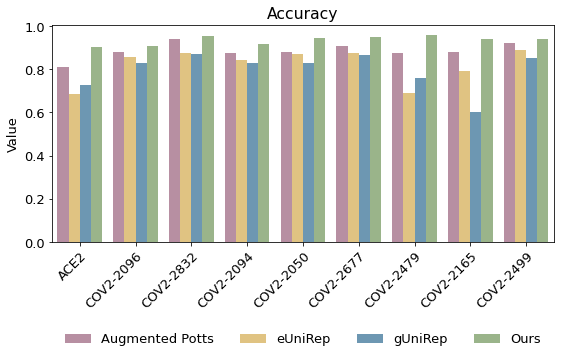

In [52]:
plt.figure(figsize=(9,4))
ax=sns.barplot(x="Task",y="value",hue="type",data=df[df.metric=="Accuracy"],palette=["#be88a2","#f0c972","#6199be","#98bb83"])
# ax.tick_params(axis='x', rotation=45)
plt.setp(ax.get_xticklabels(), rotation=45, ha="right", rotation_mode="anchor")
ax.yaxis.set_major_locator(MultipleLocator(0.2))
hands, labs = ax.get_legend_handles_labels()
new_labels=["Augmented Potts","eUniRep","gUniRep","Ours"]
plt.legend(handles=hands,bbox_to_anchor=(0.5, -0.5), loc='lower center', borderaxespad=0,labels=new_labels,ncol=4,frameon=False)
ax.set_xlabel(xlabel=None)
ax.set_ylabel(ylabel="Value",fontsize=13)
ax.set_title("Accuracy")
# plt.savefig('figures/Models_accuracy.png',dpi=500,bbox_inches = 'tight')

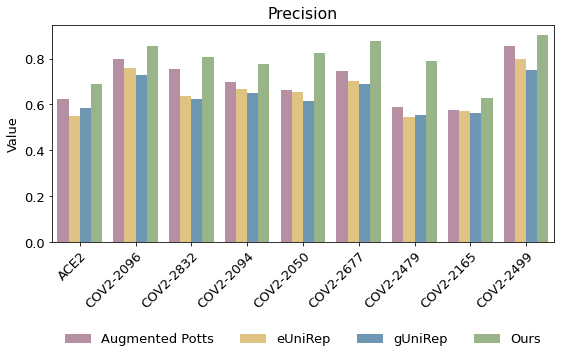

In [53]:
plt.figure(figsize=(9,4))
ax=sns.barplot(x="Task",y="value",hue="type",data=df[df.metric=="Precision"],palette=["#be88a2","#f0c972","#6199be","#98bb83"])
# ax.tick_params(axis='x', rotation=45)
plt.setp(ax.get_xticklabels(), rotation=45, ha="right", rotation_mode="anchor")
ax.yaxis.set_major_locator(MultipleLocator(0.2))
hands, labs = ax.get_legend_handles_labels()
new_labels=["Augmented Potts","eUniRep","gUniRep","Ours"]
plt.legend(handles=hands,bbox_to_anchor=(0.5, -0.5), loc='lower center', borderaxespad=0,labels=new_labels,ncol=4,frameon=False)
ax.set_xlabel(xlabel=None)
ax.set_ylabel(ylabel="Value",fontsize=13)
ax.set_title("Precision")
plt.savefig('figures/Models_Precision.png',dpi=500,bbox_inches = 'tight')

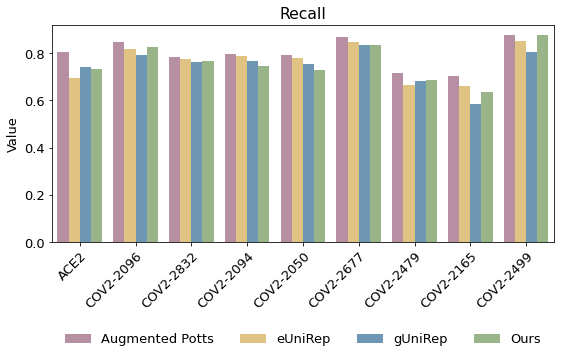

In [54]:
plt.figure(figsize=(9,4))
ax=sns.barplot(x="Task",y="value",hue="type",data=df[df.metric=="Recall"],palette=["#be88a2","#f0c972","#6199be","#98bb83"])
# ax.tick_params(axis='x', rotation=45)
plt.setp(ax.get_xticklabels(), rotation=45, ha="right", rotation_mode="anchor")
ax.yaxis.set_major_locator(MultipleLocator(0.2))
hands, labs = ax.get_legend_handles_labels()
new_labels=["Augmented Potts","eUniRep","gUniRep","Ours"]
plt.legend(handles=hands,bbox_to_anchor=(0.5, -0.5), loc='lower center', borderaxespad=0,labels=new_labels,ncol=4,frameon=False)
ax.set_xlabel(xlabel=None)
ax.set_ylabel(ylabel="Value",fontsize=13)
ax.set_title("Recall")
plt.savefig('figures/Models_Recall.png',dpi=500,bbox_inches = 'tight')

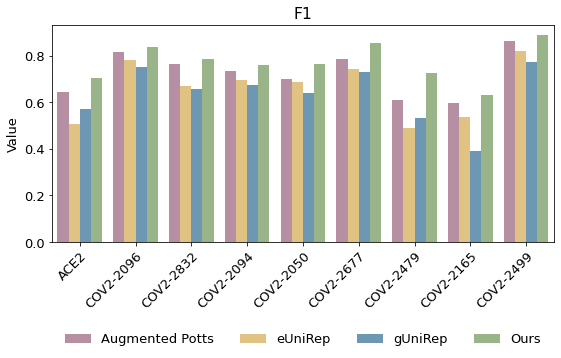

In [55]:
plt.figure(figsize=(9,4))
ax=sns.barplot(x="Task",y="value",hue="type",data=df[df.metric=="F1"],palette=["#be88a2","#f0c972","#6199be","#98bb83"])
# ax.tick_params(axis='x', rotation=45)
plt.setp(ax.get_xticklabels(), rotation=45, ha="right", rotation_mode="anchor")
ax.yaxis.set_major_locator(MultipleLocator(0.2))
hands, labs = ax.get_legend_handles_labels()
new_labels=["Augmented Potts","eUniRep","gUniRep","Ours"]
plt.legend(handles=hands,bbox_to_anchor=(0.5, -0.5), loc='lower center', borderaxespad=0,labels=new_labels,ncol=4,frameon=False)
ax.set_xlabel(xlabel=None)
ax.set_ylabel(ylabel="Value",fontsize=13)
ax.set_title("F1")
plt.savefig('figures/Models_F1.png',dpi=500,bbox_inches = 'tight')

### five fold plot

In [56]:
model_metric_all["type"]="our_model"
aug_metric_all["type"]="aug"
eunirep_metric_all["type"]="eunirep"
gunirep_metric_all["type"]="gunirep"

In [57]:
fivefold_df=pd.concat([aug_metric_all,eunirep_metric_all,gunirep_metric_all,model_metric_all])

In [58]:
fivefold_df.head()

,task,fold,Accuracy,Precision,Recall,F1,type
0,ACE2,0,0.829370,0.635236,0.828069,0.663230,aug
1,COV2-2096,0,0.874575,0.783127,0.839146,0.805656,aug
2,COV2-2832,0,0.940946,0.740764,0.764005,0.751725,aug
3,COV2-2094,0,0.873008,0.706453,0.812370,0.741231,aug
4,COV2-2050,0,0.879540,0.663174,0.801393,0.701380,aug


Text(0.5, 1.0, 'Accuracy')

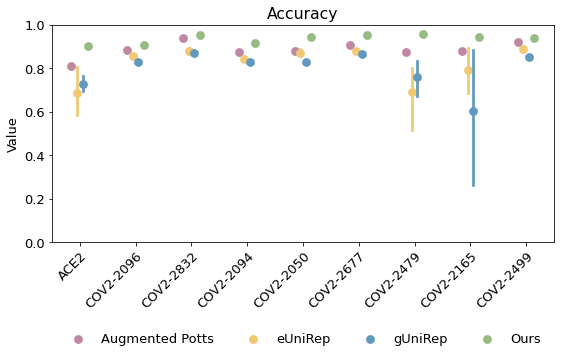

In [59]:
plt.figure(figsize=(9,4))
ax=sns.pointplot(x="task",y="Accuracy",hue="type",data=fivefold_df,palette=["#be88a2","#f0c972","#6199be","#98bb83"],join=False,dodge=0.3)
ax.tick_params(axis='x', rotation=45)
plt.setp(ax.get_xticklabels(), rotation=45, ha="right", rotation_mode="anchor")
ax.set_ylim([0,1])
ax.set_ylim([0,1])
ax.yaxis.set_major_locator(MultipleLocator(0.2))
hands, labs = ax.get_legend_handles_labels()
new_labels=["Augmented Potts","eUniRep","gUniRep","Ours"]
plt.legend(handles=hands,bbox_to_anchor=(0.5, -0.5), loc='lower center', borderaxespad=0,labels=new_labels,ncol=4,frameon=False)
ax.set_xlabel(xlabel=None)
ax.set_ylabel(ylabel="Value",fontsize=13)
ax.set_title("Accuracy")
# plt.savefig('figures/errorbar_Models_accuracy.png',dpi=500,bbox_inches = 'tight')

Text(0.5, 1.0, 'Precision')

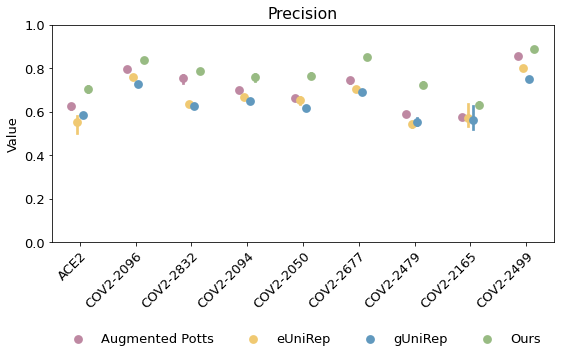

In [60]:
plt.figure(figsize=(9,4))
ax=sns.pointplot(x="task",y="Precision",hue="type",data=fivefold_df,palette=["#be88a2","#f0c972","#6199be","#98bb83"],join=False,dodge=0.3)
#ax=sns.stripplot(x="task",y="Accuracy",hue="type",data=box_df,color="0.25")
ax.tick_params(axis='x', rotation=45)
plt.setp(ax.get_xticklabels(), rotation=45, ha="right", rotation_mode="anchor")
ax.set_ylim([0,1])
ax.yaxis.set_major_locator(MultipleLocator(0.2))
hands, labs = ax.get_legend_handles_labels()
new_labels=["Augmented Potts","eUniRep","gUniRep","Ours"]
plt.legend(handles=hands,bbox_to_anchor=(0.5, -0.5), loc='lower center', borderaxespad=0,labels=new_labels,ncol=4,frameon=False)
ax.set_xlabel(xlabel=None)
ax.set_ylabel(ylabel="Value",fontsize=13)
ax.set_title("Precision")
# plt.savefig('figures/errorbar_Models_precision.png',dpi=500,bbox_inches = 'tight')

Text(0.5, 1.0, 'Recall')

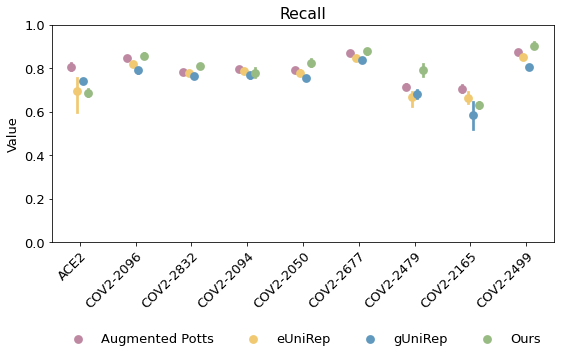

In [61]:
plt.figure(figsize=(9,4))
ax=sns.pointplot(x="task",y="Recall",hue="type",data=fivefold_df,palette=["#be88a2","#f0c972","#6199be","#98bb83"],join=False,dodge=0.3)
#ax=sns.stripplot(x="task",y="Accuracy",hue="type",data=box_df,color="0.25")
ax.tick_params(axis='x', rotation=45)
plt.setp(ax.get_xticklabels(), rotation=45, ha="right", rotation_mode="anchor")
ax.set_ylim([0,1])
ax.yaxis.set_major_locator(MultipleLocator(0.2))
hands, labs = ax.get_legend_handles_labels()
new_labels=["Augmented Potts","eUniRep","gUniRep","Ours"]
plt.legend(handles=hands,bbox_to_anchor=(0.5, -0.5), loc='lower center', borderaxespad=0,labels=new_labels,ncol=4,frameon=False)
ax.set_xlabel(xlabel=None)
ax.set_ylabel(ylabel="Value",fontsize=13)
ax.set_title("Recall")
# plt.savefig('figures/errorbar_Models_Recall.png',dpi=500,bbox_inches = 'tight')

Text(0.5, 1.0, 'F1')

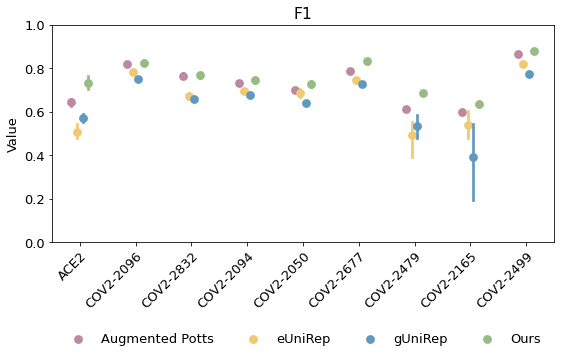

In [62]:
plt.figure(figsize=(9,4))
ax=sns.pointplot(x="task",y="F1",hue="type",data=fivefold_df,palette=["#be88a2","#f0c972","#6199be","#98bb83"],join=False,dodge=0.3)
#ax=sns.stripplot(x="task",y="Accuracy",hue="type",data=box_df,color="0.25")
ax.tick_params(axis='x', rotation=45)
plt.setp(ax.get_xticklabels(), rotation=45, ha="right", rotation_mode="anchor")
ax.set_ylim([0,1])
ax.yaxis.set_major_locator(MultipleLocator(0.2))
hands, labs = ax.get_legend_handles_labels()
new_labels=["Augmented Potts","eUniRep","gUniRep","Ours"]
plt.legend(handles=hands,bbox_to_anchor=(0.5, -0.5), loc='lower center', borderaxespad=0,labels=new_labels,ncol=4,frameon=False)
ax.set_xlabel(xlabel=None)
ax.set_ylabel(ylabel="Value",fontsize=13)
ax.set_title("F1")
# plt.savefig('figures/errorbar_Models_F1.png',dpi=500,bbox_inches = 'tight')

## Ablation study

### Barplot

In [63]:
df2=pd.concat([wide_to_long(no_freeze_metric,"esm_freeze"),wide_to_long(rand_noise_metric,"rand_noise"),wide_to_long(model_metric,"our_model")])

Text(0.5, 1.0, 'Accuracy')

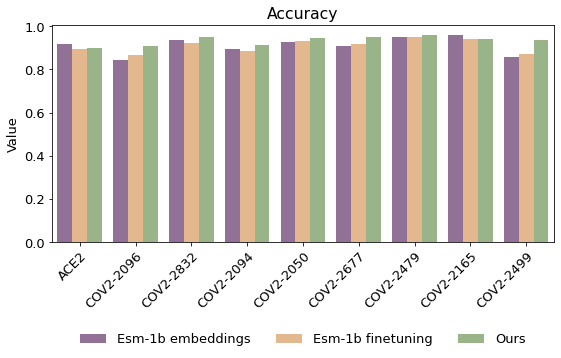

In [64]:
plt.figure(figsize=(9,4))
ax=sns.barplot(x="Task",y="value",hue="type",data=df2[df2.metric=="Accuracy"],palette=["#966b9d","#f2b880","#98bb83"])
# ax.tick_params(axis='x', rotation=45)
plt.setp(ax.get_xticklabels(), rotation=45, ha="right", rotation_mode="anchor")
ax.yaxis.set_major_locator(MultipleLocator(0.2))
hands, labs = ax.get_legend_handles_labels()
new_labels=["Esm-1b embeddings","Esm-1b finetuning","Ours"]
plt.legend(handles=hands,bbox_to_anchor=(0.5, -0.5), loc='lower center', borderaxespad=0,labels=new_labels,ncol=4,frameon=False)
ax.set_xlabel(xlabel=None)
ax.set_ylabel(ylabel="Value",fontsize=13)
ax.set_title("Accuracy")
# plt.savefig('figures/ablation_accuracy.png',dpi=500,bbox_inches = 'tight')

Text(0.5, 1.0, 'Precision')

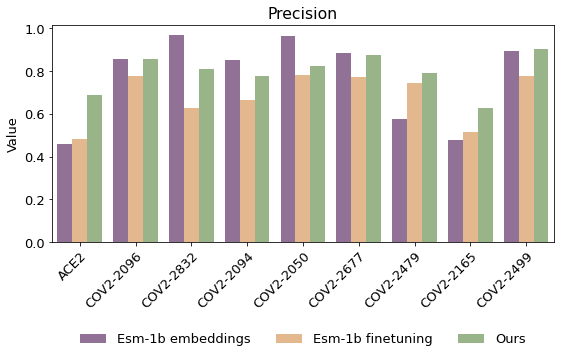

In [65]:
plt.figure(figsize=(9,4))
ax=sns.barplot(x="Task",y="value",hue="type",data=df2[df2.metric=="Precision"],palette=["#966b9d","#f2b880","#98bb83"])
# ax.tick_params(axis='x', rotation=45)
plt.setp(ax.get_xticklabels(), rotation=45, ha="right", rotation_mode="anchor")
ax.yaxis.set_major_locator(MultipleLocator(0.2))
hands, labs = ax.get_legend_handles_labels()
new_labels=["Esm-1b embeddings","Esm-1b finetuning","Ours"]
plt.legend(handles=hands,bbox_to_anchor=(0.5, -0.5), loc='lower center', borderaxespad=0,labels=new_labels,ncol=4,frameon=False)
ax.set_xlabel(xlabel=None)
ax.set_ylabel(ylabel="Value",fontsize=13)
ax.set_title("Precision")
# plt.savefig('figures/ablation_Precision.png',dpi=500,bbox_inches = 'tight')

Text(0.5, 1.0, 'Recall')

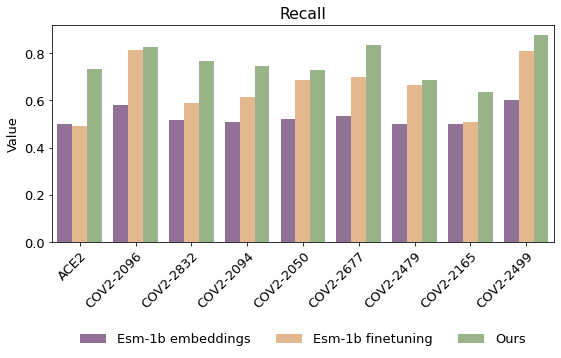

In [66]:
plt.figure(figsize=(9,4))
ax=sns.barplot(x="Task",y="value",hue="type",data=df2[df2.metric=="Recall"],palette=["#966b9d","#f2b880","#98bb83"])
# ax.tick_params(axis='x', rotation=45)
plt.setp(ax.get_xticklabels(), rotation=45, ha="right", rotation_mode="anchor")
ax.yaxis.set_major_locator(MultipleLocator(0.2))
hands, labs = ax.get_legend_handles_labels()
new_labels=["Esm-1b embeddings","Esm-1b finetuning","Ours"]
plt.legend(handles=hands,bbox_to_anchor=(0.5, -0.5), loc='lower center', borderaxespad=0,labels=new_labels,ncol=4,frameon=False)
ax.set_xlabel(xlabel=None)
ax.set_ylabel(ylabel="Value",fontsize=13)
ax.set_title("Recall")
# plt.savefig('figures/ablation_Recall.png',dpi=500,bbox_inches = 'tight')

Text(0.5, 1.0, 'F1')

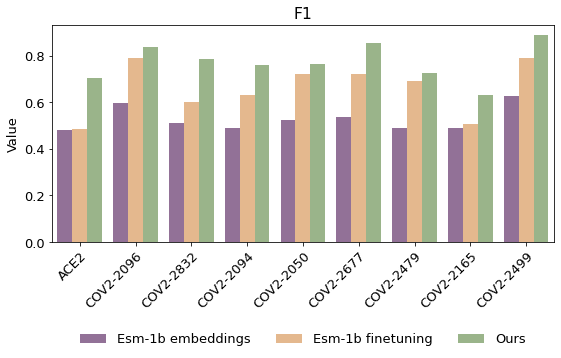

In [67]:
plt.figure(figsize=(9,4))
ax=sns.barplot(x="Task",y="value",hue="type",data=df2[df2.metric=="F1"],palette=["#966b9d","#f2b880","#98bb83"])
# ax.tick_params(axis='x', rotation=45)
plt.setp(ax.get_xticklabels(), rotation=45, ha="right", rotation_mode="anchor")
ax.yaxis.set_major_locator(MultipleLocator(0.2))
hands, labs = ax.get_legend_handles_labels()
new_labels=["Esm-1b embeddings","Esm-1b finetuning","Ours"]
plt.legend(handles=hands,bbox_to_anchor=(0.5, -0.5), loc='lower center', borderaxespad=0,labels=new_labels,ncol=4,frameon=False)
ax.set_xlabel(xlabel=None)
ax.set_ylabel(ylabel="Value",fontsize=13)
ax.set_title("F1")
# plt.savefig('figures/ablation_F1.png',dpi=500,bbox_inches = 'tight')

### Five fold plot

In [68]:
model_metric_all["type"]="our_model"
rand_noise_metric_all["type"]="rand_noise"
no_freeze_metric_all["type"]="no_freeze"

In [69]:
fivefold_df2=pd.concat([no_freeze_metric_all,rand_noise_metric_all,model_metric_all])

In [70]:
fivefold_df2.head()

,task,fold,Accuracy,Precision,Recall,F1,type
0,ACE2,0,0.923177,0.461589,0.500000,0.480027,no_freeze
1,COV2-2096,0,0.847400,0.867015,0.579273,0.595077,no_freeze
2,COV2-2832,0,0.941469,0.970681,0.515152,0.514309,no_freeze
3,COV2-2094,0,0.893650,0.946714,0.509639,0.490770,no_freeze
4,COV2-2050,0,0.929187,0.964426,0.531142,0.540189,no_freeze


Text(0.5, 1.0, 'Accuracy')

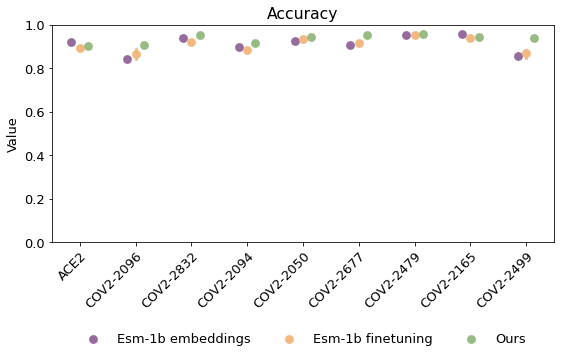

In [71]:
plt.figure(figsize=(9,4))
ax=sns.pointplot(x="task",y="Accuracy",hue="type",data=fivefold_df2,palette=["#966b9d","#f2b880","#98bb83"],join=False,dodge=0.3)
#ax=sns.stripplot(x="task",y="Accuracy",hue="type",data=box_df,color="0.25")
ax.tick_params(axis='x', rotation=45)
plt.setp(ax.get_xticklabels(), rotation=45, ha="right", rotation_mode="anchor")
ax.set_ylim([0,1])
ax.set_ylim([0,1])
ax.yaxis.set_major_locator(MultipleLocator(0.2))
hands, labs = ax.get_legend_handles_labels()
new_labels=["Esm-1b embeddings","Esm-1b finetuning","Ours"]
plt.legend(handles=hands,bbox_to_anchor=(0.5, -0.5), loc='lower center', borderaxespad=0,labels=new_labels,ncol=4,frameon=False)
ax.set_xlabel(xlabel=None)
ax.set_ylabel(ylabel="Value",fontsize=13)
ax.set_title("Accuracy")
# plt.savefig('figures/errorbar_ablation_accuracy.png',dpi=500,bbox_inches = 'tight')

Text(0.5, 1.0, 'Precision')

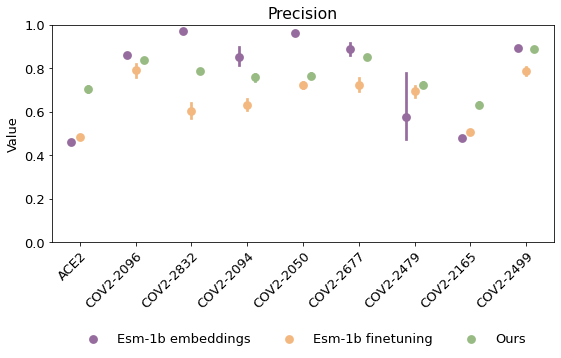

In [72]:
plt.figure(figsize=(9,4))
ax=sns.pointplot(x="task",y="Precision",hue="type",data=fivefold_df2,palette=["#966b9d","#f2b880","#98bb83"],join=False,dodge=0.3)
#ax=sns.stripplot(x="task",y="Accuracy",hue="type",data=box_df,color="0.25")
ax.tick_params(axis='x', rotation=45)
plt.setp(ax.get_xticklabels(), rotation=45, ha="right", rotation_mode="anchor")
ax.set_ylim([0,1])
ax.set_ylim([0,1])
ax.yaxis.set_major_locator(MultipleLocator(0.2))
hands, labs = ax.get_legend_handles_labels()
new_labels=["Esm-1b embeddings","Esm-1b finetuning","Ours"]
plt.legend(handles=hands,bbox_to_anchor=(0.5, -0.5), loc='lower center', borderaxespad=0,labels=new_labels,ncol=4,frameon=False)
ax.set_xlabel(xlabel=None)
ax.set_ylabel(ylabel="Value",fontsize=13)
ax.set_title("Precision")
# plt.savefig('figures/errorbar_ablation_Precision.png',dpi=500,bbox_inches = 'tight')

Text(0.5, 1.0, 'Recall')

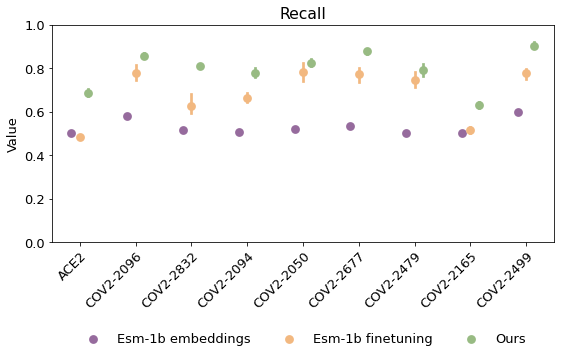

In [73]:
plt.figure(figsize=(9,4))
ax=sns.pointplot(x="task",y="Recall",hue="type",data=fivefold_df2,palette=["#966b9d","#f2b880","#98bb83"],join=False,dodge=0.3)
#ax=sns.stripplot(x="task",y="Accuracy",hue="type",data=box_df,color="0.25")
ax.tick_params(axis='x', rotation=45)
plt.setp(ax.get_xticklabels(), rotation=45, ha="right", rotation_mode="anchor")
ax.set_ylim([0,1])
ax.set_ylim([0,1])
ax.yaxis.set_major_locator(MultipleLocator(0.2))
hands, labs = ax.get_legend_handles_labels()
new_labels=["Esm-1b embeddings","Esm-1b finetuning","Ours"]
plt.legend(handles=hands,bbox_to_anchor=(0.5, -0.5), loc='lower center', borderaxespad=0,labels=new_labels,ncol=4,frameon=False)
ax.set_xlabel(xlabel=None)
ax.set_ylabel(ylabel="Value",fontsize=13)
ax.set_title("Recall")
# plt.savefig('figures/errorbar_ablation_Recall.png',dpi=500,bbox_inches = 'tight')

Text(0.5, 1.0, 'F1')

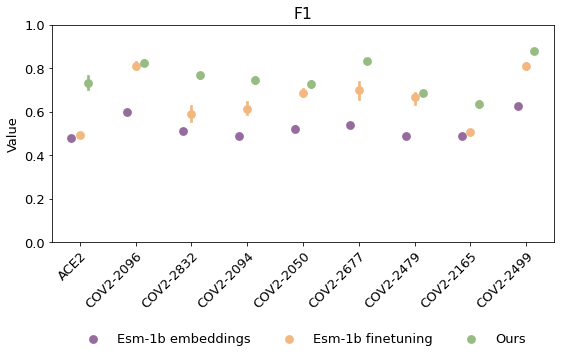

In [74]:
plt.figure(figsize=(9,4))
ax=sns.pointplot(x="task",y="F1",hue="type",data=fivefold_df2,palette=["#966b9d","#f2b880","#98bb83"],join=False,dodge=0.3)
#ax=sns.stripplot(x="task",y="Accuracy",hue="type",data=box_df,color="0.25")
ax.tick_params(axis='x', rotation=45)
plt.setp(ax.get_xticklabels(), rotation=45, ha="right", rotation_mode="anchor")
ax.set_ylim([0,1])
ax.set_ylim([0,1])
ax.yaxis.set_major_locator(MultipleLocator(0.2))
hands, labs = ax.get_legend_handles_labels()
new_labels=["Esm-1b embeddings","Esm-1b finetuning","Ours"]
plt.legend(handles=hands,bbox_to_anchor=(0.5, -0.5), loc='lower center', borderaxespad=0,labels=new_labels,ncol=4,frameon=False)
ax.set_xlabel(xlabel=None)
ax.set_ylabel(ylabel="Value",fontsize=13)
ax.set_title("F1")
# plt.savefig('figures/errorbar_ablation_F1.png',dpi=500,bbox_inches = 'tight')